In [ ]:
# https://pypi.org/project/hurst/
!pip install hurst

ADF Statistic: -5.622627
p-value: 0.000001
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
(ADF) TSA is mean reverting
Hurst exponent = 0.510
(H) TSA is trending


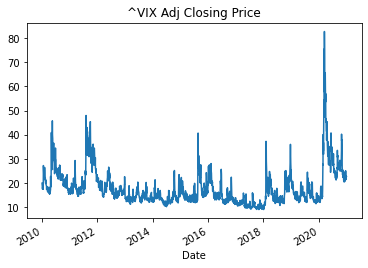

In [ ]:
import statsmodels.tsa.stattools as ts
from datetime import datetime
import pandas_datareader as pdr
from hurst import compute_Hc

stonk = "^VIX"
 
stock = pdr.DataReader(stonk, "yahoo", datetime(2010,1,1), datetime(2020,12,31))

stock['Adj Close'].plot(title=str(stonk)+' Adj Closing Price')

# Augmented Dickey–Fuller test (ADF) detects if a time series contains unit root. 
# Technically the name of unit root comes from the fact that the autoregressive 
# polynomial has a root on the unit circle but basically it implies nonstationary.
# Main point: if ADF stat < chosen critical value, then TSA is mean reverting
adf_results = ts.adfuller(stock['Adj Close'], 1)
print('ADF Statistic: %f' % adf_results[0])
print('p-value: %f' % adf_results[1])
print('Critical Values:')
for key, value in adf_results[4].items():
	print('\t%s: %.3f' % (key, value))

if adf_results[1] > 0.05:
  print('(ADF) TSA is trending')
else:
  print('(ADF) TSA is mean reverting')

# Another way of looking at stationarity is to compare it with Geometric Brownian Motion (GBM) - Hurst exponent test. 
# A stationary price series is meant to diffuse more slowly than GBM.
# more settings: https://github.com/Mottl/hurst/blob/master/hurst/__init__.py
H, c, val = compute_Hc(stock['Adj Close'], kind='price', simplified=True)

print("Hurst exponent = {:.3f}".format(H))

if H > 0.5:
  print('(H) TSA is trending')
elif H < 0.5:
  print('(H) TSA is mean reverting')
else:
  print('(H) TSA is random')
# For sliding window example: https://stackoverflow.com/questions/57096574/how-to-apply-the-hurst-exponent-in-python-in-a-rolling-window

## For ADF
• p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is trending. <br>
• p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary. <br>

## For Hurst
• H < 0.5 - The time series is mean reverting <br>
• H = 0.5 - The time series is a Geometric Brownian Motion<br>
• H > 0.5 - The time series is trending<br>
